# Analyse timestamps of fits files from a Seestar S50 session to show dropped frame stats

In [1]:
# config data

EXP_TIME = 10.0 # exposure time
PROC_TIME = 1.0  #overhead for stacking
CYCLE_TIME = EXP_TIME + PROC_TIME  # approx elapsed time for a single imaging cycle of 10s

TICK_INTERVAL = 15 * 60  # tick spacing in timeline plot (in s)

In [2]:
# file handling

from astropy.io import fits
from pathlib import Path
from datetime import datetime as dt
import numpy as np

def read_timestamp(file):
    with fits.open(file) as hdul:
        hdr = hdul[0].header
        return hdr['DATE-OBS']
    
def read_all_timestamps(dir):
    fit_path = Path(dir)
    return [read_timestamp(p) for p in fit_path.glob('*.fit')]



In [37]:
# analysis

def timestamps_to_floats(ts, normalise = False):
    # return results as numpy array for further analysis
    floats =  np.array([dt.fromisoformat(t).timestamp() for t in ts])
    if normalise: 
        floats = floats - float[0]
    
    return floats

def timestamp_gaps(ts):
    return np.round(np.diff(ts/CYCLE_TIME)) - 1



In [4]:
# Basic stats for this run
import sys
from datetime import timedelta

def print_stats(f = sys.stdout):
    nframes = len(timestamps)
    skip_frames = int(sum(gaps))
    frame_slots = skip_frames + nframes
    total_time = dt.fromtimestamp(float_timestamps[-1] - float_timestamps[0]).strftime('%H:%M:%S')
    integration_time = timedelta(seconds = nframes * EXP_TIME)

    print('Total number of image slots: ', frame_slots, file = f)
    print('Total number of image frames: ', nframes, file = f)
    print('Skipped frames: ', skip_frames, file = f)
    print(f'Capture efficiency: {nframes / frame_slots:.1%}', file = f)
    print('Longest run of dropped frames: ', int(max(counter)), file = f)
    print('Total elapsed imaging time: ', total_time, file = f)
    print('Total integration time: ', integration_time, file = f)



In [5]:
# directory containing fits lights
# run from here for a new set of lights

FITS_DIR = 'C:/SeeStar_images/IC 1396/2023-12-06/IC 1396-sub/'

In [38]:
timestamps = read_all_timestamps(FITS_DIR)

float_timestamps = timestamps_to_floats(timestamps)

gaps = timestamp_gaps(float_timestamps)

In [39]:
import collections

counter = collections.Counter(gaps)
counter

Counter({0.0: 181, 1.0: 54, 2.0: 6, 3.0: 1, 5.0: 2})

In [40]:
with open(FITS_DIR + 'frame_stats.txt', 'w') as f:
    print_stats(f)

print_stats()

Total number of image slots:  324
Total number of image frames:  245
Skipped frames:  79
Capture efficiency: 75.6%
Longest run of dropped frames:  5
Total elapsed imaging time:  01:01:02
Total integration time:  0:40:50


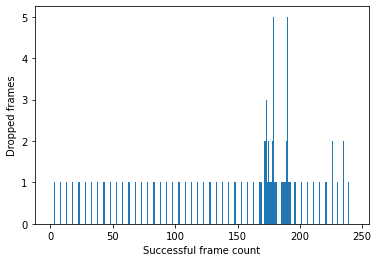

In [41]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator


# gap plot
indices = list(range(len(gaps)))
plt.bar(indices, gaps, 1)
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0d'))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Successful frame count')
plt.ylabel('Dropped frames')
plt.savefig(FITS_DIR + 'frame_gaps.png', format = 'png')
plt.show()


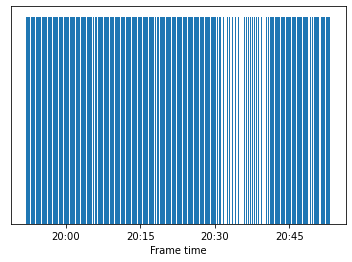

In [42]:
# linear plot

import matplotlib.ticker as ticker 

def label_format(ts, pos):
    return dt.fromtimestamp(ts).strftime('%H:%M')


plt.bar(float_timestamps, 1, CYCLE_TIME)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(TICK_INTERVAL))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(label_format))
plt.xlabel('Frame time')
plt.savefig(FITS_DIR + 'frame_timings.png', format = 'png')
plt.show()


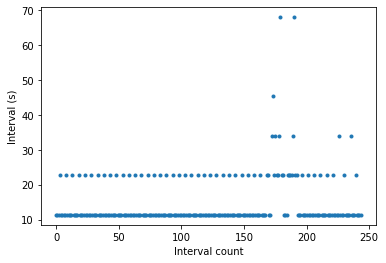

In [47]:
# scatter plot of intervals

intervals = np.diff([float_timestamps])

indices = list(range(len(gaps)))
plt.scatter(indices, intervals, marker = ".")
plt.xlabel('Interval count')
plt.ylabel('Interval (s)')
plt.savefig(FITS_DIR + 'frame_intervals.png', format = 'png')
plt.show()

In [45]:
intervals

array([[11.33269882, 11.34219718, 11.33372402, 22.6412909 , 11.35736489,
        11.33722711, 11.37484002, 11.34450698, 22.705549  , 11.40878391,
        11.34829211, 11.33531904, 11.35910082, 22.66940117, 11.38235283,
        11.33014703, 11.33614516, 11.33558989, 22.68862796, 11.36310816,
        11.3313899 , 11.34679604, 11.34366202, 22.67329192, 11.38119197,
        11.33378506, 11.33670402, 11.3599031 , 22.69654393, 11.32743692,
        11.33697796, 11.35763311, 11.33534598, 22.63690901, 11.36515999,
        11.32484889, 11.35420418, 11.3402319 , 22.6409421 , 11.3376658 ,
        11.33187604, 11.33035803, 11.33489013, 22.63830686, 11.38539696,
        11.33512402, 11.34730005, 11.34775996, 22.63445401, 11.36555505,
        11.33447695, 11.33027506, 11.33515692, 22.64101315, 11.35544896,
        11.33970094, 11.32821798, 11.33537006, 22.63590598, 11.33310604,
        11.34231496, 11.36697292, 11.34745121, 22.641572  , 11.34712696,
        11.3440609 , 11.33381009, 11.36719799, 22.6